In [ ]:
#!pip install catboost

In [24]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

In [25]:
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100

In [27]:
df_total = pd.read_csv('/content/prepared_items_df.csv')

In [37]:
cols = ['price', 'sqmeter_price', 'subway', 'minutes_to_subway', 'rooms', 'total_area', 'balcony', 'type_of_renovation', 'type_of_house', 'cur_floor', 'cnt_floors']

In [38]:
df = df_total[cols].copy()

In [39]:
df

,price,sqmeter_price,subway,minutes_to_subway,rooms,total_area,balcony,type_of_renovation,type_of_house,cur_floor,cnt_floors
0,9400000,164912.0,Комендантский проспект,30,2,57.0,нет,евро,панельный,1,10
1,8300000,166000.0,Пионерская,15,2,50.0,лоджия,косметический,монолитный,11,12
2,7200000,153191.0,Академическая,15,2,47.0,балкон,требует ремонта,панельный,8,9
3,8149000,162980.0,Купчино,20,2,50.0,нет,косметический,панельный,7,9
4,8700000,155357.0,Озерки,20,3,56.0,"балкон, лоджия",косметический,панельный,2,9
...,...,...,...,...,...,...,...,...,...,...,...
647,9500000,163793.0,Проспект Просвещения,5,3,58.0,лоджия,косметический,панельный,5,9
648,9400000,188000.0,Гражданский проспект,30,2,50.0,лоджия,косметический,панельный,5,9
649,8250000,144736.0,Парнас,20,2,57.0,балкон,требует ремонта,монолитно-кирпичный,17,19
650,9200000,129577.0,Купчино,31,3,71.0,лоджия,косметический,панельный,4,5


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               652 non-null    int64  
 1   sqmeter_price       652 non-null    float64
 2   subway              652 non-null    object 
 3   minutes_to_subway   652 non-null    int64  
 4   rooms               652 non-null    int64  
 5   total_area          652 non-null    float64
 6   balcony             652 non-null    object 
 7   type_of_renovation  652 non-null    object 
 8   type_of_house       652 non-null    object 
 9   cur_floor           652 non-null    int64  
 10  cnt_floors          652 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 56.2+ KB


In [41]:
df.describe()

,price,sqmeter_price,minutes_to_subway,rooms,total_area,cur_floor,cnt_floors
count,6.520000e+02,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,8.197242e+06,162596.697853,22.411043,2.271472,51.099693,4.917178,9.880368
std,1.143137e+06,24772.759113,8.634216,0.445061,8.237873,4.169881,5.913699
min,3.350000e+06,59821.000000,5.000000,2.000000,25.000000,1.000000,2.000000
25%,7.400000e+06,147090.250000,15.000000,2.000000,45.000000,2.000000,5.000000
50%,8.300000e+06,160815.500000,20.000000,2.000000,50.000000,4.000000,9.000000
75%,9.000000e+06,175687.750000,31.000000,3.000000,57.000000,7.000000,12.000000
max,1.000000e+07,303960.000000,31.000000,3.000000,87.000000,24.000000,29.000000


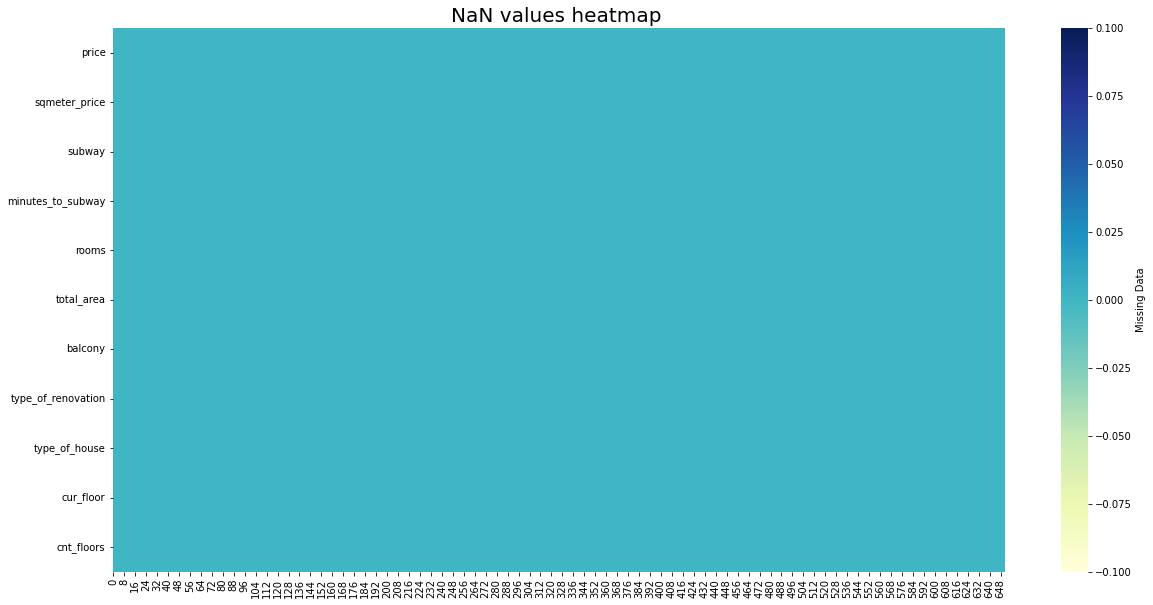

In [42]:
plt.figure(figsize=(20,10))
plt.title("NaN values heatmap ", fontsize =20)
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


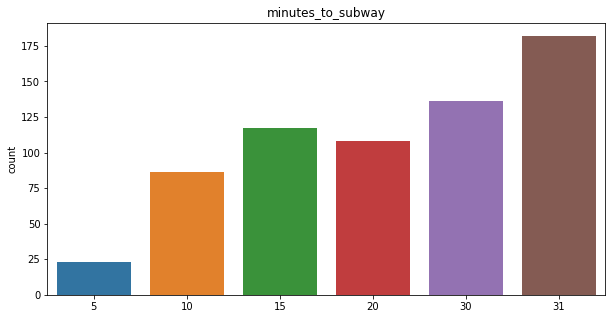

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(df['minutes_to_subway']).set(title='minutes_to_subway', xlabel=None);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


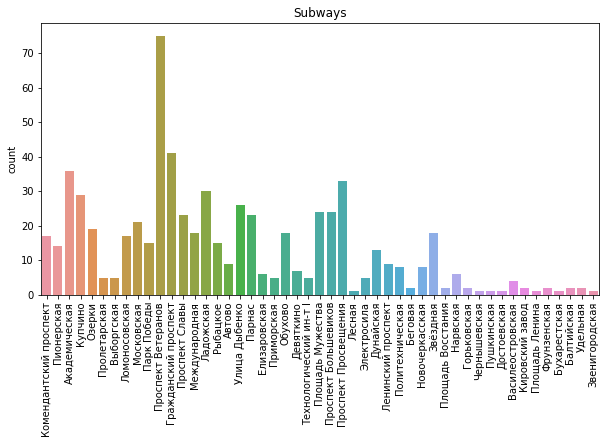

In [44]:
plt.figure(figsize=(10,5))
p = sns.countplot(df['subway'])
p.set_xticklabels(p.get_xticklabels(), rotation=90)
p.set(title ='Subways', xlabel=None);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


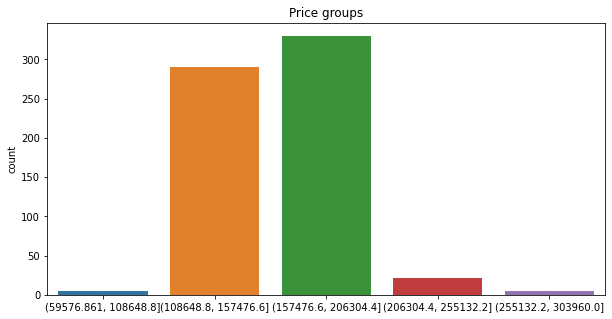

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(pd.cut(df['sqmeter_price'], 5)).set(title='Price groups',xlabel=None);

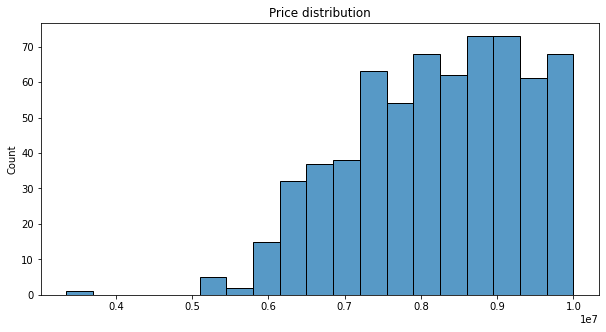

In [46]:
plt.figure(figsize=(10,5))
sns.histplot(df['price']).set(title='Price distribution', xlabel=None);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


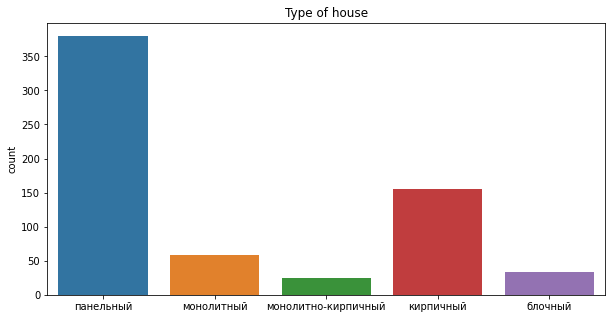

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(df['type_of_house']).set(title='Type of house', xlabel=None);

# Разметка таргета по формуле

In [48]:
def evaluation(df):
  cnt = 0
  
  #price
  const = 1000000
  cnt += (10 - df['price'] / const) * 0.1  #0.1 or 0.15 coef

  #subways
  one = ['Девяткино', 'Звёздная', 'Комендантский проспект', 'Купчино', 'Парнас', 
        'Проспект Большевиков', 'Рыбацкое', 'Улица Дыбенко', 'Проспект Славы', 
        'Дунайская', 'Шушары','Проспект Ветеранов']
  two = ['Академическая', 'Гражданский проспект', 'Ленинский проспект', 
         'Международная', 'Бухарестская', 'Ладожская', 'Новочеркасская',
         'Площадь Мужества', 'Обухово', 'Политехническая', 'Проспект Просвещения',
         'Удельная']
  three = ['Автово', 'Выборгская', 'Нарвская', 'Кировский завод' ,'Пионерская', 
           'Пролетарская', 'Чёрная речка', 'Чернышевская', 'Чкаловская']
  four = ['Волковская' ,'Звенигородская', 'Крестовский остров', 'Лесная', 
          'Московская', 'Московские ворота', 'Озерки', 'Парк Победы', 
          'Приморская', 'Спортивная', 'Электросила']
  five = ['Горьковская', 'Гостиный двор', 'Адмиралтейская', 'Балтийская', 
          'Василеостровская', 'Владимирская', 'Достоевская', 'Елизаровская',
          'Лиговский проспект', 'Ломоносовская', 'Маяковская' , 'Невский проспект',
          'Обводный канал', 'Петроградская' ,'Площадь А. Невского I', 
          'Площадь А. Невского II', 'Площадь Восстания','Площадь Ленина', 
          'Пушкинская', 'Садовая', 'Сенная площадь', 'Спасская', 'Старая Деревня',
          'Технологический ин-т II', 'Технологический ин-т I', 'Фрунзенская', 
          'Василеостровская']

  if df['subway'] in one:
    cnt += 0.1
  elif df['subway'] in two:
    cnt += 0.2
  elif df['subway'] in three:
    cnt += 0.3
  elif df['subway'] in four:
    cnt += 0.4
  elif df['subway'] in five:
    cnt += 0.5
  else:
    cnt += 0.25

  #distance_to_subway
  if df['minutes_to_subway'] <= 5:
    cnt += 0.3
  elif df['minutes_to_subway'] <= 10:
    cnt += 0.4
  elif df['minutes_to_subway'] <= 15:
    cnt += 0.35
  elif df['minutes_to_subway'] <= 20:
    cnt += 0.2
  elif df['minutes_to_subway'] <= 30:
    cnt += 0.1
  elif df['minutes_to_subway'] > 30:
    cnt += 0
  else:
    cnt += 0.3


  #Floor
  if df['cur_floor'] < 2:
    cnt += 0
  elif df['cur_floor'] == 2:
    cnt += 0.3
  elif df['cur_floor'] <= 3:
    cnt += 0.4
  elif df['cur_floor'] <= 5:
    cnt += 0.25
  elif df['cur_floor'] <= 8:
    cnt += 0.1
  elif df['cur_floor'] <= 10:
    cnt += 0.05
  elif df['cur_floor'] <= 15:
    cnt += 0
  elif df['cur_floor'] > 15:
    cnt += 0
  else:
    cnt += 0.1


  #balcony
  if df['balcony'] == 'нет':
    cnt += 0.05
  elif df['balcony'] == 'балкон':
    cnt+= 0.25
  elif df['balcony'] == 'лоджия':
    cnt+= 0.3
  elif df['balcony'] == 'балкон, лоджия':
    cnt+= 0.25
  else:
    cnt+= 0.1

  #type_of_hose
  if df['type_of_house'] =='кирпичный':
    cnt += 0.35
  elif df['type_of_house'] =='панельный':
    cnt+= 0.2
  elif df['type_of_house'] =='блочный':
    cnt+= 0.25
  elif df['type_of_house'] =='монолитный':
    cnt+= 0.1
  elif df['type_of_house'] =='монолитно-кирпичный':
    cnt+= 0.35
  else:
    cnt+= 0.15


  #renovation
  if df['type_of_renovation'] =='косметический':
    cnt += 0.25
  elif df['type_of_renovation'] =='требует ремонта':
    cnt += 0.1
  elif df['type_of_renovation'] =='евро':
    cnt += 0.4
  elif df['type_of_renovation'] =='дизайнерский':
    cnt += 0.4
  elif df['type_of_renovation'] =='неизвестно':
    cnt += 0.1
  else:
    cnt+=0.1
    
  #rooms
  if df['rooms'] == 2:
    cnt += 0.3
  if df['rooms'] == 3:
    cnt += 0.45
  
  return round(cnt * 100)

In [49]:
df['rating'] = df.apply(evaluation, axis=1)

In [51]:
df.sort_values(by='rating', ascending=False)[:20]

,price,sqmeter_price,subway,minutes_to_subway,rooms,total_area,balcony,type_of_renovation,type_of_house,cur_floor,cnt_floors,rating
207,8320000,193488.0,Елизаровская,15,2,43.0,балкон,дизайнерский,кирпичный,3,5,272
113,9000000,163636.0,Парк Победы,15,3,55.0,балкон,евро,панельный,3,5,255
588,7900000,179545.0,Московская,15,2,44.0,балкон,косметический,кирпичный,3,5,251
317,8490000,207073.0,Московская,15,2,41.0,балкон,евро,кирпичный,2,5,250
125,8350000,141525.0,Ломоносовская,20,3,59.0,лоджия,косметический,кирпичный,4,9,247
595,6800000,151111.0,Ломоносовская,30,2,45.0,балкон,евро,панельный,3,5,247
42,8950000,179000.0,Приморская,10,2,50.0,балкон,косметический,кирпичный,3,5,246
33,8000000,166666.0,Елизаровская,10,2,48.0,нет,косметический,кирпичный,3,4,245
165,8000000,181818.0,Московская,15,2,44.0,лоджия,косметический,кирпичный,2,5,245
84,8600000,150877.0,Электросила,10,3,57.0,нет,косметический,кирпичный,3,5,244


# Model

In [52]:
df.columns

Index(['price', 'sqmeter_price', 'subway', 'minutes_to_subway', 'rooms',
       'total_area', 'balcony', 'type_of_renovation', 'type_of_house',
       'cur_floor', 'cnt_floors', 'rating'],
      dtype='object')

In [53]:
X = df.drop('rating', axis=1)
y = df['rating']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [55]:
cat_features = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(include=object).columns]

In [ ]:
model = CatBoostRegressor()
model.fit(X_train, y_train, cat_features=cat_features)
preds = model.predict(X_test)

In [57]:
mean_absolute_error(y_test, preds)

6.794749756026111

In [58]:
mean_absolute_percentage_error(y_test, preds)

0.04060418199839457

In [60]:
#save model
pickle.dump(model, open('cb_init.sav', 'wb'))

# Interpretation

In [ ]:
#!pip install shap

In [ ]:
import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df[cols])

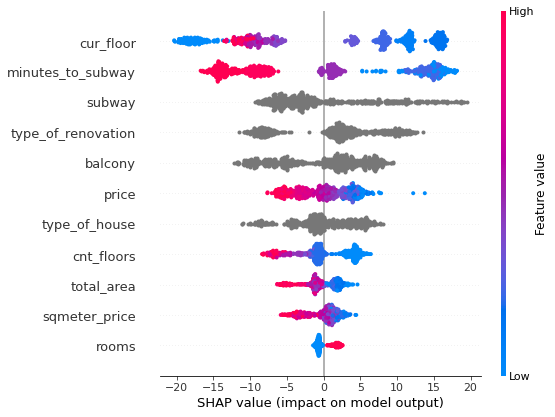

In [ ]:
shap.summary_plot(shap_values, df[cols])

# Manual interptetation

In [ ]:
X_test['TRUE'] = y_test
X_test['PRED'] = preds

In [ ]:
X_test[X_test['PRED'] > 200].sort_values('PRED', ascending=False)[:20]

,price,sqmeter_price,subway,minutes_to_subway,rooms,total_area,balcony,type_of_renovation,type_of_house,cur_floor,cnt_floors,TRUE,PRED
327,7700000,135087.0,Кировский завод,15,3,57.0,нет,косметический,кирпичный,3,5,238,237.935471
42,8950000,179000.0,Приморская,10,2,50.0,балкон,косметический,кирпичный,3,5,246,231.020973
80,8900000,148333.0,Озерки,15,3,60.0,балкон,косметический,панельный,3,9,241,229.875052
619,8300000,197619.0,Ленинский проспект,10,3,42.0,нет,евро,панельный,2,5,217,229.452802
371,9300000,166071.0,Выборгская,15,3,56.0,нет,косметический,кирпичный,4,5,207,227.895169
191,6500000,158536.0,Ленинский проспект,15,3,41.0,нет,косметический,панельный,3,5,225,227.451083
561,7800000,165957.0,Улица Дыбенко,10,2,47.0,балкон,евро,блочный,3,5,232,226.844572
592,8650000,149137.0,Озерки,15,3,58.0,лоджия,требует ремонта,панельный,4,9,218,225.004282
586,8700000,147457.0,Звёздная,15,3,59.0,балкон,косметический,блочный,2,5,208,224.156237
409,6290000,139777.0,Политехническая,15,2,45.0,нет,косметический,блочный,2,5,207,222.472193


In [ ]:
X_test[X_test['PRED'] > 300].sort_values('TRUE', ascending=False)

,price,sqmeter_price,subway,minutes_to_subway,rooms,total_area,balcony,type_of_renovation,type_of_house,cur_floor,cnt_floors,TRUE,PRED
186,6500000,158536.0,Ленинский проспект,15,3,41.0,нет,косметический,панельный,3,5,335,335.308211
619,8300000,197619.0,Ленинский проспект,10,3,42.0,нет,евро,панельный,2,5,319,313.878818
426,5990000,139302.0,Проспект Ветеранов,10,2,43.0,балкон,косметический,кирпичный,4,5,315,302.776958
545,5990000,146097.0,Автово,15,2,41.0,нет,требует ремонта,панельный,2,6,305,304.143606


In [ ]:
X_test[(X_test['PRED'] < 210)&(X_test['PRED'] > 180)].sort_values('TRUE', ascending=False)

,price,subway,distance_to_subway,rooms,total_area,living_area,kitchen_area,balcony,type_of_renovation,type_of_house,floor,cnt_floor,TRUE,PRED
47,9300000,Ломоносовская,900,2,45.0,26.0,7.0,балкон,дизайнерский,панельный,5,10,233.60,204.523156
307,7600000,Елизаровская,700,2,42.0,28.0,5.0,балкон,косметический,кирпичный,4,5,225.20,205.715244
147,8600000,Озерки,800,2,45.0,29.0,8.0,лоджия,косметический,панельный,7,9,211.20,199.602413
51,8000000,Фрунзенская,300,2,52.0,31.0,12.0,нет,косметический,кирпичный,5,6,211.00,199.616491
618,9000000,Академическая,1800,3,57.0,42.0,8.0,балкон,евро,панельный,3,5,210.00,207.400619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,7470000,Академическая,1300,2,42.0,28.0,7.0,нет,косметический,кирпичный,2,5,177.94,180.073477
468,8300000,Звёздная,2100,2,49.0,24.0,12.0,лоджия,евро,кирпичный,11,15,177.60,184.463066
650,10000000,Комендантский проспект,1700,3,72.0,44.0,8.0,балкон,требует ремонта,панельный,8,10,177.00,184.226213
425,8250000,Комендантский проспект,1600,2,44.0,28.0,6.0,лоджия,косметический,панельный,7,9,175.50,181.258990
